# K-means

The KMeans algorithm clusters data by trying to separate samples in k groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

The objective of K-means is to minimize the average squared Euclidean distance of documents from their cluster centers, where cluster centers are:

$$
\vec{\mu}(\omega) = \frac{1}{\mid \omega \mid}\sum\limits_{\vec{x} \in \omega} \vec{x}
$$

and the **residual sum of squares** is:

$$
RSS = \sum\limits_{k=1}^{K}\sum\limits_{\vec{x}\in \omega_k} \mid \vec{x} - \vec{\mu}(\omega_k) \mid^2
$$

Main steps:
- Randomly (or with other criteria) choose K objects as centers (called **seeds**)
- Each seed represent a cluster
- **Assign** documents to the cluster $\omega_i$ with the closest centroid $\vec{\mu}(\omega_i)$
- **Refine** centroids on the bases of the current objects in the clusters
- Repeat assignement and refinement until termination

Termination options:
- Fixed number of iterations
- Assignment does not change clusters (the centroids do not change)
- RSS falls below a threshold

## Init the MEC environment

In [1]:
from IPython.core.display import display, HTML
import nbimporter
from mecdb import MEC
import sklearn.cluster as cls
import numpy as np


def show(doc, w=120):
    style = 'width: ' + str(w) + 'px;'
    try:
        url = doc['image']
    except KeyError:
        url = 'https://cdn0.iconfinder.com/data/icons/large-glossy-icons/512/No.png'
    display(HTML('<img src="' + url + '" style="' + style + '">'))

    
def show_grid(docs, w=120, row=6):
    style = 'width: ' + str(w) + 'px; display: inline;'
    html_row = []
    for doc in docs:
        try:
            url = doc['image']
        except KeyError:
            url = 'https://cdn0.iconfinder.com/data/icons/large-glossy-icons/512/No.png'
        html_row.append('<img src="' + url + '" style="' + style + '">')
        if len(html_row) == row:
            display(HTML("".join(html_row)))
            html_row = []
    display(HTML("".join(html_row)))
    

dataset = 'calzedoniajson_items_0'
mec = MEC(dataset)


importing Jupyter notebook from mecdb.ipynb


In [2]:
M = mec.dataset_matrix(size=len(mec.dictionary))

# Python sklearn implementation

In [3]:
kmeans = cls.KMeans(n_clusters=2).fit(M)

In [4]:
print kmeans.labels_

[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1
 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


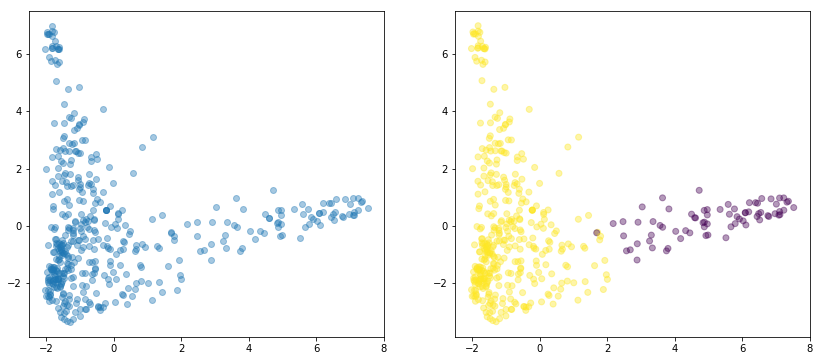

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
mec.visualize(M, axes[0])
mec.visualize(M, axes[1], labels=kmeans.labels_)
plt.show()



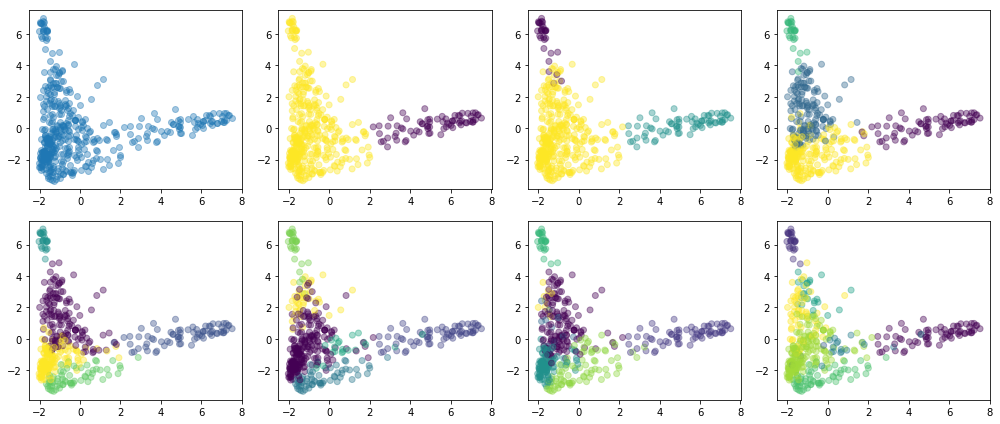

In [6]:
keys = range(2, 9)
clustering = [cls.KMeans(n_clusters=k).fit(M).labels_ for k in keys]
cols = 4
rows = int(np.ceil(float(len(clustering)+1)/cols))
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(14, 6))
mec.visualize(M, axes[0,0])
for i in range(1, len(keys)+1):
    mec.visualize(M, axes[i/cols,i%cols], labels=clustering[i-1])
plt.tight_layout()
plt.show()



### Cluster preview

In [12]:
docs_per_cluster, k = 20, 4
clusters = cls.KMeans(n_clusters=k).fit(M).labels_
partition = dict((x, []) for x in range(0, k))
for i, l in enumerate(clusters):
    partition[l].append(mec.docs[i])
for cluster, resources in partition.items():
    display(HTML('<h2>Cluster '+str(cluster)+'</h2>'))
    show_grid(resources[:docs_per_cluster], row=3)

### Clustering tags
We can apply clustering to tags by simply fit the clustering algorithm with the transposed matrix.

In [23]:
tags_per_cluster, k = 20, 12
clusters = cls.KMeans(n_clusters=k).fit(M.T).labels_
partition = dict((x, []) for x in range(0, k))
tags = sorted(mec.dictionary.keys())
for i, l in enumerate(clusters):
    partition[l].append(tags[i])
for cluster, tags in partition.items():
    display(HTML('<h2>Cluster '+str(cluster)+'</h2>'))
    print ", ".join(tags[:tags_per_cluster])


acoustic, band, bowed stringed instrument, competition, concert, dancer, dancing, festival, group, guitar, guitarist, instrument, many, music, musician, performance, pop, show, singer, song


Halloween, Luna, Pilate, World Wide Web, accident, accomplishment, acrobat, action, actor, actress, administration, adolescent, advice, agility, aid, analogue, anatomy, anniversary, announcement, aquarium


Christmas, New Year, blur, bright, card, celebration, decoration, eve, glisten, gold, illuminated, light, luminescence, merry, party, shining, winter


adult, dress, one, people, portrait, wear


brassiere, erotic, figure, lingerie, pantie, seduction, skin, thin, underwear


chair, family, floor, flower arrangement, furniture, home, hotel, house, indoors, interior design, luxury, patio, room, rug, seat, sofa, table, vase, window


beach, bikini, enjoyment, fair weather, fun, leisure, nature, ocean, recreation, relaxation, sand, sea, seashore, sky, summer, sun, sunglasses, swimming, swimsuit, tan


abstract, alphabet, art, business, cloud, communication, composition, conceptual, creativity, definition, design, education, graphic, handwriting, illustration, internet, isolated, leadership, letter, management


attractive, beautiful, cute, elegant, fashion, girl, glamour, hair, lady, long, model, person, pretty, sexy, style, woman, young


airplane, car, city, drive, fossil fuel, fuel, gasoline, man, military, outdoors, pavement, plastic, police, rally, road, safety, street, transportation system, urban, vehicle


accessory, bag, box, color, cotton, desktop, fabric, gift, handmade, heart, love, money, needle, no person, note, paper, pattern, sale, scarf, scissors


active, aerobics, athlete, balance, body, bodybuilding, brawny, exercise, fitness, gymnastics, health, slender, sport, strength, weight, yoga


## Evaluation of assignment quality
Given a resource, either a document or a tag, we can measure the quality of its assignment to the cluster as the distance between the resource vector and the cluster centroid.

In [24]:
kmeans = cls.KMeans(n_clusters=k).fit(M.T)
clusters = kmeans.labels_
partition = dict((x, []) for x in range(0, k))
tags = sorted(mec.dictionary.keys())
for i, l in enumerate(clusters):
    partition[l].append(tags[i])

Access to centroid of clusters:

In [25]:
print kmeans.cluster_centers_
print kmeans.inertia_

[[  3.99941649e-01   2.50854389e-01   1.58123750e-01 ...,   7.57977931e-01
    1.38777878e-17  -1.38777878e-17]
 [  2.89541669e-02   5.25472423e-02   2.06357486e-02 ...,   1.85639299e-02
    8.11534000e-02   1.75374157e-02]
 [  1.85117153e-01   2.10824999e-01   6.62805088e-01 ...,   7.23208648e-01
    3.51515361e-01   5.47495431e-02]
 ..., 
 [  1.58820713e+00  -1.38777878e-17  -1.38777878e-17 ...,  -2.08166817e-17
    1.38777878e-17   0.00000000e+00]
 [ -1.38777878e-17  -2.77555756e-17   1.38777878e-17 ...,  -2.08166817e-17
    9.25101996e-02   1.39352804e+00]
 [  0.00000000e+00  -1.38777878e-17   0.00000000e+00 ...,  -1.38777878e-17
    1.38777878e-17  -2.77555756e-17]]
44043.2657803


In [26]:
for k_e in range(2, 20):
    kmeans_e = cls.KMeans(n_clusters=k_e).fit(M.T)
    print k_e, kmeans_e.inertia_

2 52662.9189426
3 50471.0608309
4 49071.9126983
5 48084.098799
6 47564.0203219
7 46561.0945351
8 45758.6297068
9 45618.7185223
10 45270.7042762
11 44500.8530095
12 44093.1638241
13 43776.5190148
14 43347.3054075
15 42881.2461412
16 42492.3478992
17 41967.9393675
18 41688.7878427
19 41219.0153874


In [17]:
from scipy.spatial import distance as ds

def tag_distance(cluster, partition, kmeans, tags, matrix):
    tag_distances = []
    for tag in partition[cluster]:
        center = kmeans.cluster_centers_[cluster]
        v = matrix.T[tags.index(tag)]
        distance = ds.euclidean(center, v)
        tag_distances.append((tag, distance))
    return sorted(tag_distances, key=lambda x: x[1])

for cluster in range(0, k):
    print tag_distance(cluster, partition, kmeans, tags, M)[:3]

[(u'side view', 3.3290288477855845), (u'ballet dancer', 3.36837874354552), (u'wellbeing', 3.41852589316537)]
[(u'fashion', 7.7626881332592275), (u'woman', 8.018902704814298), (u'girl', 8.457005548367066)]
[(u'content', 4.106751028938629), (u'ceremony', 4.310473119398895), (u'information', 4.491568783963934)]
[(u'pantie', 8.31738042882516), (u'erotic', 8.752329097009452), (u'lingerie', 8.83330134737205)]
[(u'heat', 4.974089438933504), (u'exposed', 5.0500850582167445), (u'sparkler', 5.071771775517063)]
[(u'water', 7.546303683642153), (u'vacation', 8.007076294250595), (u'beach', 8.535499257056705)]
[(u'success', 8.016717092608104), (u'alphabet', 8.058084582794578), (u'letter', 8.275045547731322)]
[(u'simple', 4.410611029579159), (u'far-out', 4.505675203777635), (u'line', 4.6166531708374645)]
[(u'management', 4.272148259042823), (u'cloud', 5.000352840586401), (u'typographic', 5.6283055754708515)]
[(u'strength', 7.36918371507739), (u'exercise', 8.138584922789303), (u'active', 8.198371138953

## Overview of cluster homogeneity
The distribution of distances from resources to cluster centroids provides a way to look at the homogeneity of the cluster.

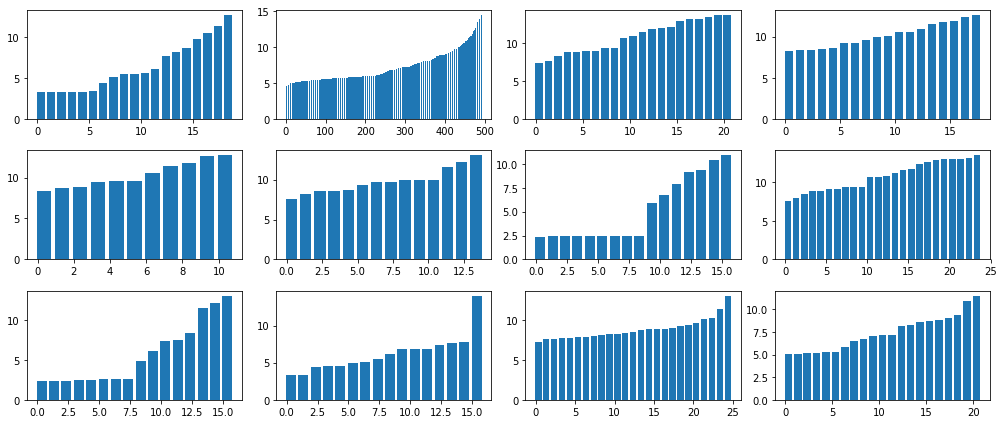

In [27]:
distances = []
for cluster in range(0, k):
    distances.append([x[1] for x in tag_distance(cluster, partition, kmeans, tags, M)])

width = 0.35 
cols = 4
fig, axes = plt.subplots(nrows=int(np.ceil(float(k)/cols)), ncols=cols, figsize=(14, 6))
for cl in range(0, k):
    axes[cl/cols, cl%cols].bar(np.arange(len(distances[cl]))+width, distances[cl])
plt.tight_layout()
plt.show()

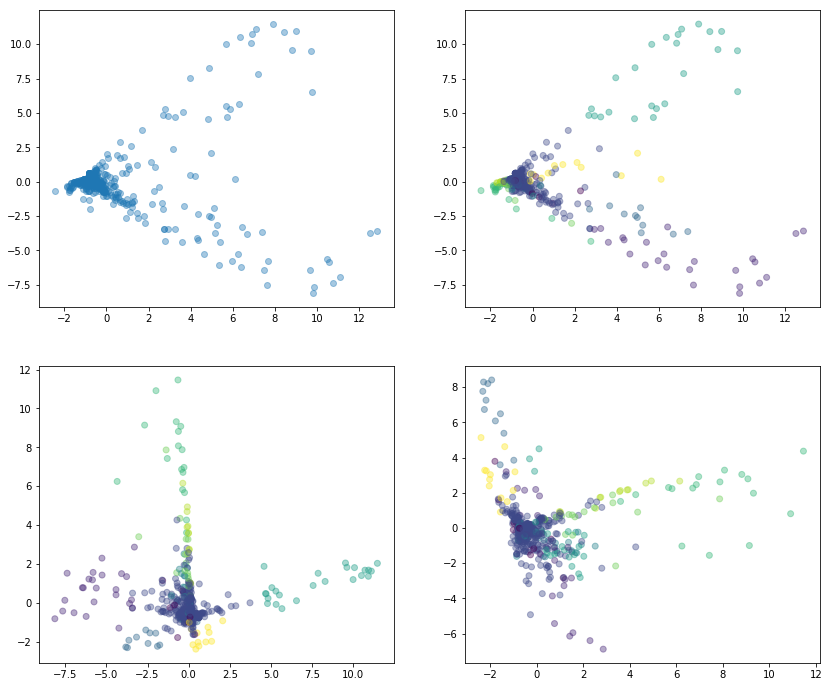

In [22]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
mec.visualize(M.T, axes[0,0])
mec.visualize(M.T, axes[0,1], labels=kmeans.labels_)
mec.visualize(M.T, axes[1,0], labels=kmeans.labels_, p1=1, p2=2)
mec.visualize(M.T, axes[1,1], labels=kmeans.labels_, p1=2, p2=3)
plt.show()



## Simplify terminology
In order to simplify the terminology, we can create clusters of tags within a cluster.

In [ ]:
tags = sorted(mec.dictionary.keys())

cluster = 0
cl_k = 6

cluster_labels = []
for tag in partition[cluster]:
    v = M.T[tags.index(tag)]
    cluster_labels.append((tag, v))
T = np.array([x[1] for x in cluster_labels])
cluster_means = cls.KMeans(n_clusters=cl_k).fit(T)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
mec.visualize(T, axes[0])
mec.visualize(T, axes[1], cluster_means.labels_)
plt.show()

In [ ]:
print 'Cluster', cluster, 'is described by', len(partition[cluster]), 'labels'
cluster_partition = dict((x, []) for x in range(0, cl_k))
for i, l in enumerate(cluster_means.labels_):
    cluster_partition[l].append(cluster_labels[i][0])
for cl_i, cl_tags in cluster_partition.items():
    display(HTML('<h2>Cluster '+str(cl_i)+'</h2>'))
    print ", ".join(cl_tags)